# SD212: Graph mining
## Lab 1: Graph structure

In this lab, you will check three structural properties of real graphs:
* the [power-law](https://en.wikipedia.org/wiki/Power_law#Power-law_probability_distributions) of degrees,
* the [small-world](https://en.wikipedia.org/wiki/Small-world_network) property,
* the tendency to [cluster](https://en.wikipedia.org/wiki/Clustering_coefficient).

## Import

In [27]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [28]:
from sknetwork.data import load_netset, erdos_renyi
from sknetwork.path import get_distances, get_diameter, get_shortest_path
from sknetwork.utils import bipartite2undirected
from sknetwork.topology import Triangles

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)
* Cinema (bipartite graph)

In [29]:
openflights = load_netset('openflights')

Parsing files...
Done.


In [30]:
type(openflights)

sknetwork.utils.Bunch

In [31]:
# weighted adjacency matrix
adjacency = openflights.adjacency

In [32]:
# binary adjacency matrix
adjacency = adjacency > 0

In [33]:
adjacency

<3097x3097 sparse matrix of type '<class 'numpy.bool_'>'
	with 36386 stored elements in Compressed Sparse Row format>

In [34]:
wikivitals = load_netset('wikivitals')

Parsing files...
Done.


In [35]:
cinema = load_netset('cinema')

Parsing files...
Done.


## 1. Power law

We first focus on the power law degree distribution.

We consider the empirical distributions of:
* degrees in the Openflights graph,
* in-degrees and out-degrees in the WikiVitals graph.

## To do

For each of these distributions:
* Plot the [tail distribution](https://en.wikipedia.org/wiki/Cumulative_distribution_function#Complementary_cumulative_distribution_function_(tail_distribution)) in log-log scale.
* Conclude: do you consider that these are power-law graphs?

In [36]:
def plot_loglog(degrees):
    """Plot the degree distribution in log-log scale and compare with that of a random graph.
    
    Parameters
    ----------
    degrees : array
        vector of degrees of the graph.
    """
    n = len(degrees)
    # comparison with a random graph
    adjacency_random = erdos_renyi(n, np.sum(degrees) / n / (n-1))
    degrees_random = adjacency_random.dot(np.ones(n))
    plt.loglog(np.sort(degrees), 1 - np.arange(n) / n, lw = 3, label='Real graph')
    plt.loglog(np.sort(degrees_random), 1 - np.arange(n) / n, lw = 3, label = 'Random graph')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

In [37]:
deg_openflights = openflights.adjacency.dot(np.ones(openflights.adjacency.shape[0]))
deg_wikivitals = wikivitals.adjacency.dot(np.ones(wikivitals.adjacency.shape[0]))
deg_cinema = cinema.biadjacency.dot(np.ones(cinema.biadjacency.shape[1]))

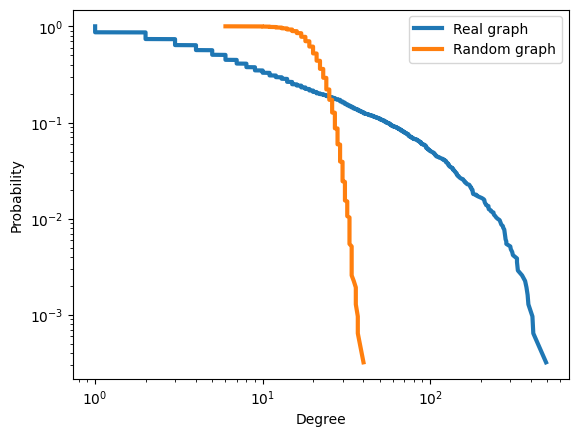

In [38]:
plot_loglog(deg_openflights)

"\nn1 = len(deg_openflights)\nadjacency_random = erdos_renyi(n1, np.sum(deg_openflights) / n1 / (n1-1))\ndegrees_random = adjacency_random.dot(np.ones(n1))\nax[0].loglog(np.sort(degrees_random), 1 - np.arange(n1) / n1, lw = 3, label = 'Random graph')\nn2 = len(deg_wikivitals)\nadjacency_random = erdos_renyi(n2, np.sum(deg_wikivitals) / n2 / (n2-1))\ndegrees_random = adjacency_random.dot(np.ones(n2))\nax[1].loglog(np.sort(degrees_random), 1 - np.arange(n2) / n2, lw = 3, label = 'Random graph')\nn3 = len(deg_cinema)\nadjacency_random = erdos_renyi(n3, np.sum(deg_cinema) / n3 / (n3-1))\ndegrees_random = adjacency_random.dot(np.ones(n3))\nax[2].loglog(np.sort(degrees_random), 1 - np.arange(n3) / n3, lw = 3, label = 'Random graph')\nplt.show()\n"

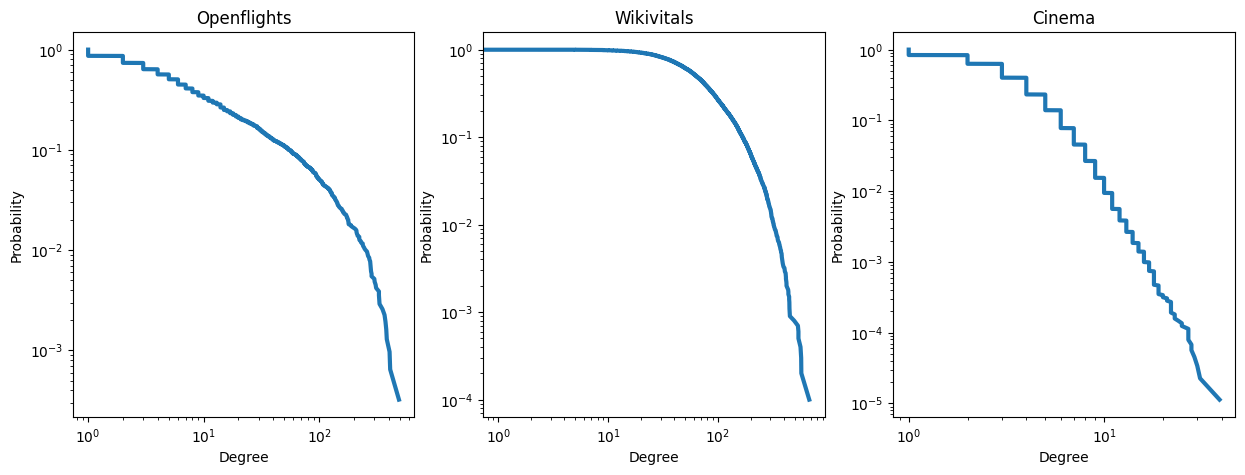

In [39]:
## Create a subplot for the 3 graphs
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# Titles
ax[0].set_title('Openflights')
ax[1].set_title('Wikivitals')
ax[2].set_title('Cinema')
# Labels
ax[0].set_xlabel('Degree')
ax[1].set_xlabel('Degree')
ax[2].set_xlabel('Degree')
ax[0].set_ylabel('Probability')
ax[1].set_ylabel('Probability')
ax[2].set_ylabel('Probability')
# Plot
ax[0].loglog(np.sort(deg_openflights), 1 - np.arange(len(deg_openflights)) / len(deg_openflights), lw = 3)
ax[1].loglog(np.sort(deg_wikivitals), 1 - np.arange(len(deg_wikivitals)) / len(deg_wikivitals), lw = 3)
ax[2].loglog(np.sort(deg_cinema), 1 - np.arange(len(deg_cinema)) / len(deg_cinema), lw = 3)
# Plot random graph for comparison
"""
n1 = len(deg_openflights)
adjacency_random = erdos_renyi(n1, np.sum(deg_openflights) / n1 / (n1-1))
degrees_random = adjacency_random.dot(np.ones(n1))
ax[0].loglog(np.sort(degrees_random), 1 - np.arange(n1) / n1, lw = 3, label = 'Random graph')
n2 = len(deg_wikivitals)
adjacency_random = erdos_renyi(n2, np.sum(deg_wikivitals) / n2 / (n2-1))
degrees_random = adjacency_random.dot(np.ones(n2))
ax[1].loglog(np.sort(degrees_random), 1 - np.arange(n2) / n2, lw = 3, label = 'Random graph')
n3 = len(deg_cinema)
adjacency_random = erdos_renyi(n3, np.sum(deg_cinema) / n3 / (n3-1))
degrees_random = adjacency_random.dot(np.ones(n3))
ax[2].loglog(np.sort(degrees_random), 1 - np.arange(n3) / n3, lw = 3, label = 'Random graph')
plt.show()
"""

`openflights` and `cinema` seem to follow the power rule law quite well, but not wikivitals. The random graph does not so it affirms its empirical character. 

## 2. Small-world

You will now make a few experiments highlighting the small-world property.

## To do

* Give a shortest path of maximum length starting from **Paris Charles de Gaulle** airport in Openflights.<br> 
List the corresponding airports.
* Give a shortest path from [Plato](https://en.wikipedia.org/wiki/Plato) to [Platini](https://en.wikipedia.org/wiki/Michel_Platini) in WikiVitals.<br>
List the corresponding articles.

In [40]:
n = adjacency.shape[0]
cdg = np.where(openflights.names == 'Charles de Gaulle International Airport')[0][0]
distances = get_distances(adjacency=adjacency, sources = cdg)
idx = np.argmax(distances)
print(openflights.names[idx], " : ", distances[idx])


Peawanuck Airport  :  7.0


In [53]:
n = wikivitals.adjacency.shape[0]
plato = np.where(wikivitals.names == 'Plato')[0][0]
platini = np.where(wikivitals.names == 'Michel Platini')[0][0]
path_idx = get_shortest_path(wikivitals.adjacency, sources=plato, targets=range(n))[platini]
path = wikivitals.names[path_idx]
path

# How many articles of Wikivitals have links to each of the following articles: France, Japan and Egypt?

n = wikivitals.adjacency.shape[0]
france = np.where(wikivitals.names == 'France')[0][0]
japan = np.where(wikivitals.names == 'Japan')[0][0]
egypt = np.where(wikivitals.names == 'Egypt')[0][0]

link_to_france = wikivitals.adjacency[:, france].sum()
link_to_japan = wikivitals.adjacency[:, japan].sum()
link_to_egypt = wikivitals.adjacency[:, egypt].sum()

print("France: ", link_to_france)
print("Japan: ", link_to_japan)
print("Egypt: ", link_to_egypt)

link_to_egypt_and_japan_and_france = wikivitals.adjacency[:, [france, japan, egypt]].sum(axis=1)
print("France, Japan and Egypt: ", np.sum(link_to_egypt_and_japan_and_france == 3))

France:  1390
Japan:  1079
Egypt:  960
France, Japan and Egypt:  185


## To do

* Which fraction of the airports can be reached from **Paris Charles de Gaulle** in 1, 2, 3 flights?
* Which fraction of the articles can be reached from **Paris** in 1, 2, 3 clicks on Wikipedia Vitals?

In [42]:
n = adjacency.shape[0]
cdg = np.where(openflights.names == 'Charles de Gaulle International Airport')[0][0]
distances = get_distances(adjacency=adjacency, sources = cdg)
for i in range(1, 5):
  print(f"In {i} flights : ", np.sum(distances == i)/len(distances))

In 1 flights :  0.07523409751372295
In 2 flights :  0.5434291249596384
In 3 flights :  0.28995802389409103
In 4 flights :  0.0736196319018405


In [43]:
n = adjacency.shape[0]
paris = np.where(wikivitals.names == 'Paris')[0][0]
distances = get_distances(adjacency=wikivitals.adjacency, sources = paris)
for i in range(1, 5):
  print(f"In {i} clicks : ", np.sum(distances == i)/len(distances))

In 1 clicks :  0.039456597742483265
In 2 clicks :  0.6346019378683448
In 3 clicks :  0.3191489361702128
In 4 clicks :  0.003695934472080711


## To do

* Compute the [Bacon number](https://fr.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon) of all actors (**without** building the co-starring actor graph).
* Plot the corresponding histogram.

In [44]:
bacon = np.where(cinema.names_col == 'Kevin Bacon')[0][0]
r, s = cinema.biadjacency.shape
cinema_adjacency = bipartite2undirected(cinema.biadjacency)
dist_aux = get_distances(cinema_adjacency, sources=bacon)[r:]
bacon_number = (dist_aux-1)/2 
# Taking into account that in the path computed before, 
# between each actor every edge is a movie
# so : path = {actor 1, movie with actor 1 and 2, actor 2, ...} 
# there are n actors, n-1 movies : 2n-1
# the bacon number is n-1
# Bacon number of elvis presley
elvis = np.where(cinema.names_col == 'Elvis Presley')[0][0]
bacon_number[elvis]


5.0

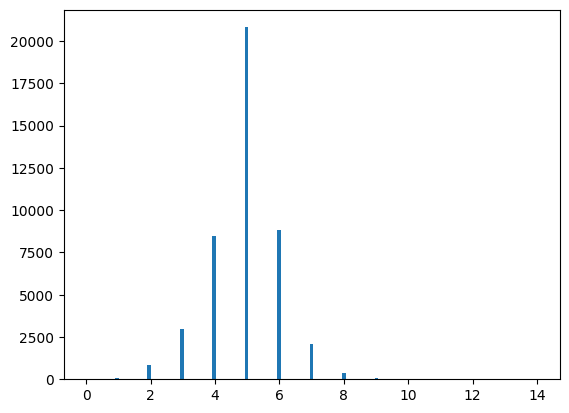

In [45]:
plt.hist(bacon_number, bins='auto')
plt.show()

## 3. Clustering coefficient

Finally, we check the clustering property of real graph (my friends tend to be friends).

## To do


* Compute the clustering coefficient of Openflights and WikiVitals (seen as an undirected graph).
* Compare with that of a random graph of same size.

In [46]:
triangles = Triangles()
nb_triangles = triangles.fit_transform(wikivitals.adjacency)
triangles.clustering_coef_

0.21128544972101573

In [47]:
triangles = Triangles()
nb_triangles = triangles.fit_transform(openflights.adjacency)
triangles.clustering_coef_

0.25107219520077

In [48]:
n = np.shape(wikivitals.adjacency)[0]
random = erdos_renyi(n)

In [49]:

#triangles = Triangles()
#nb_triangles = triangles.fit_transform(random)
#triangles.clustering_coef_